In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


# customizing chart created from chapter 11_Exercise_trending_skills

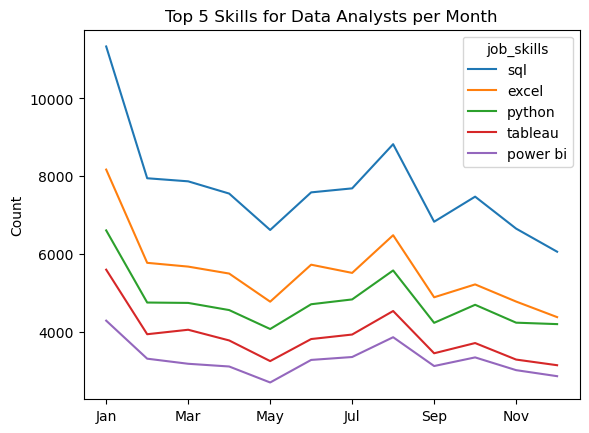

In [2]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

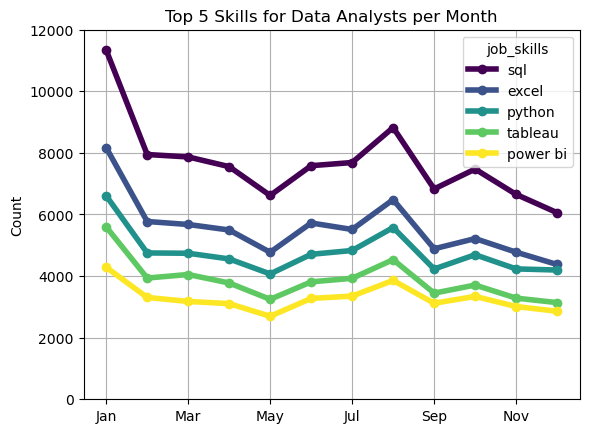

In [3]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle='-', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    markersize=6,
    marker='o', # options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    # figsize=(10, 5)
)

plt.grid(True)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylim(0, 12000)
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# customizing scatter plot from 13_scatter_plot 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Explode job_skills and group to get count and median salary
df_exploded = df.explode('job_skills')
skills_stats = df_exploded.groupby('job_skills').agg(
    skills_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

# Select top N skills by posting count
skill_count = 15
skills_stats = skills_stats.sort_values(by='skills_count', ascending=False).head(skill_count)

skills_stats

,skills_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


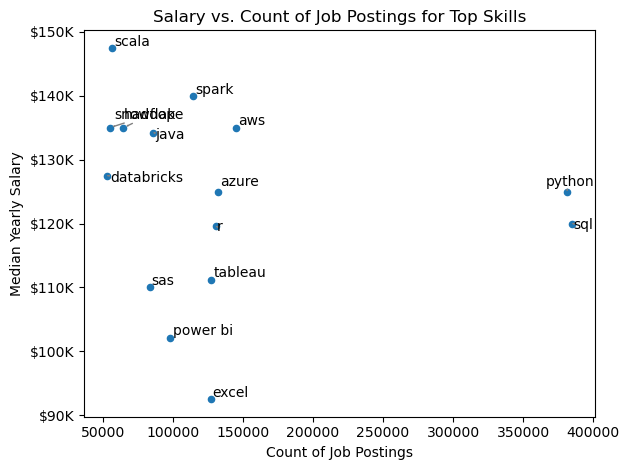

In [8]:
from adjustText import adjust_text

# Create scatter plot
skills_stats.plot(kind='scatter', x='skills_count', y='median_salary')

# Add skill labels with arrows
texts = []
for i, txt in enumerate(skills_stats.index):
    texts.append(plt.text(
        skills_stats['skills_count'].iloc[i],
        skills_stats['median_salary'].iloc[i],
        txt  
    ))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))

# Set axis labels and title
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top Skills')

# Format y-axis to show salary in $K
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

# Final layout and show plot
plt.tight_layout()
plt.show()
